### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
direct = '/content/gdrive/MyDrive/Colab Notebooks/Berkeley_Haas/'

Mounted at /content/gdrive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv(direct+'/assignment5_1_starter/'+'data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
cols = ['coupon', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',]
data[cols].head()

,coupon,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,Restaurant(<20),NaN,never,never,NaN,4~8,1~3
1,Coffee House,NaN,never,never,NaN,4~8,1~3
2,Carry out & Take away,NaN,never,never,NaN,4~8,1~3
3,Coffee House,NaN,never,never,NaN,4~8,1~3
4,Coffee House,NaN,never,never,NaN,4~8,1~3


In [ ]:
for col in cols:
    print(col, ': ', data[col].unique())

coupon :  ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
car :  [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Bar :  ['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse :  ['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway :  [nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20 :  ['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50 :  ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
## Missing Data
# Car: most data is not listed
# other columns are for type of establishment and frequency visited

## Plan
# Car: Fill with unknown mode of transport
# venue columns: drop the entries with missing venue data

In [ ]:
venues = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',]

data['car'].fillna('Not Reported', inplace=True)
data = data.iloc[data[venues].dropna().index]

/tmp/ipython-input-3656757592.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['car'].fillna('Not Reported', inplace=True)


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
print(data.Y.sum())
print(data.shape[0])

6877
12079


In [ ]:
data.Y.sum()/data.shape[0]

np.float64(0.5693352098683666)

In [ ]:
### 56.93% of observers accepted and used a coupon

5. Use a bar plot to visualize the `coupon` column.

In [ ]:
data.coupon.value_counts()

,count
coupon,
Coffee House,3816
Restaurant(<20),2653
Carry out & Take away,2280
Bar,1913
Restaurant(20-50),1417


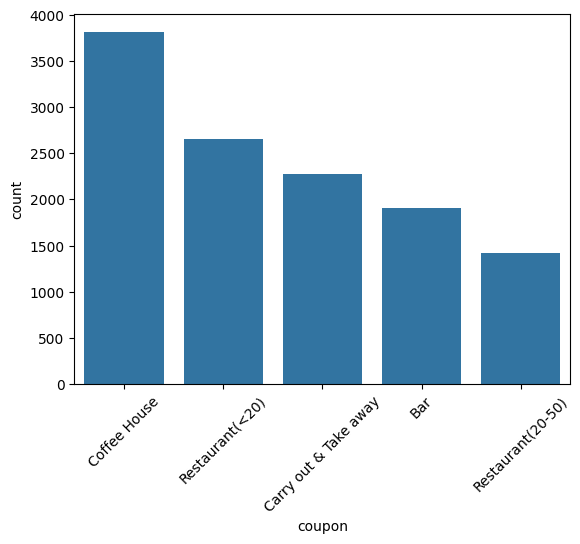

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100)
sns.barplot(
    data=data.coupon.value_counts(),
    ax=axes
)
axes.tick_params(axis='x', rotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

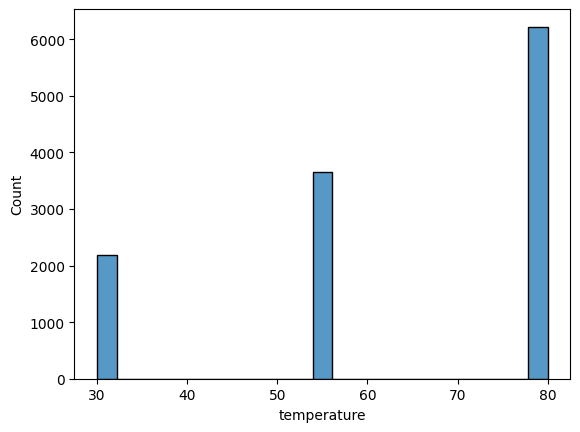

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100)
sns.histplot(
    data=data, x='temperature',
    ax=axes
)

In [ ]:
data['temperature'].unique()

array([55, 80, 30])

In [ ]:
# Temperature is only recorded at 3 values, making it categorical, rather than
# a continuous distribution between 30-degrees to 80-degrees.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coups = data[data['coupon']=='Bar']
bar_coups.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [ ]:
print(bar_coups.Y.sum())
print(bar_coups.shape[0])

788
1913


In [ ]:
bar_coups.Y.sum()/bar_coups.shape[0]

np.float64(0.41191845269210664)

In [ ]:
###
# 41.19% of bar coupons were accepted.
# This is lower than the 56.93% average usage rate for coupons in general,
# suggsting that people who go to bars do not use coupons as frequently as other shoppers.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
bar_users = bar_coups[bar_coups['Y'] == 1]
bar_coups['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [ ]:
infreq = ['never', 'less1', '1~3']
freq = ['4~8', 'gt8']
print(bar_users['Bar'].isin(freq).sum())
print(bar_users['Bar'].isin(infreq).sum())
print(bar_users.shape[0])

147
641
788


In [ ]:
print(bar_users['Bar'].isin(freq).sum()/bar_users.shape[0])
print(bar_users['Bar'].isin(infreq).sum()/bar_users.shape[0])

0.1865482233502538
0.8134517766497462


In [ ]:
###
# 18.65% of coupon recipients went to bars up to 3 times per month.
# 81.13% of coupon recipients went to bars 4 or more times per month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
print(bar_coups['Bar'].unique())
print(bar_coups['age'].unique())

['never' 'less1' '1~3' 'gt8' '4~8']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [ ]:
gt1 = ['1~3', '4~8', 'gt8']
over25 = bar_coups['age'].unique().copy()
over25 =  np.delete(over25, np.where((over25=='21') | (over25=='below21')))
print(over25)

['46' '26' '31' '41' '50plus' '36']


In [ ]:
# Those that accepted the bar coupons, are 25+,
# and go to bars more than once per month.
notGenZ = bar_coups.loc[(bar_coups['age'].isin(over25)) & (bar_coups['Bar'].isin(gt1)),:]
notGenZ.shape[0]

403

In [ ]:
# Those that accepted bar coupons, are under 25,
# and go to bars more than once per month.
GenZ = bar_coups.loc[~(bar_coups['age'].isin(over25)) & (bar_coups['Bar'].isin(gt1)),:]
GenZ.shape[0]

169

In [ ]:
# Those that accepted bar coupons and go to bars more than once per month.
# regulars will include notGenZ in its entries
regulars = bar_coups.loc[(bar_coups['Bar'].isin(gt1)),:]
regulars.shape[0]

572

In [ ]:
# The number of GenZ who frequent bars more than once per month
# + those 25+ who frequent bars more than once per month
# equal the number of regulars.

In [ ]:
# Those that accepted bar coupons and but do not go to bars.
teetotalers = bar_coups.loc[
    ~(bar_coups['Bar'].isin(gt1))
    # & (bar_coups['age']!='below21')
]
teetotalers.shape[0]

1341

In [ ]:
# With teetotalers including those 'below21', the number of
# teetotalers + the number of regulars will equal the number of people who
# accepted bar coupons.

In [ ]:
# Compare notGenZ with a concatenation of teetotalers and GenZ
df_concat = pd.concat([teetotalers, GenZ], axis=0)
print(notGenZ.shape[0])
print(df_concat.shape[0])
print(bar_coups.shape[0])

403
1510
1913


In [ ]:
notGenZ.shape[0]/bar_coups.shape[0]

0.21066387872451647

In [ ]:
df_concat.shape[0]/bar_coups.shape[0]

0.7893361212754836

In [ ]:
# Question 4:
# Compare the acceptance rate between drivers who go to a bar more than once a
# month and are over the age of 25 to the all others. Is there a difference?

###
# 21.07% of those who accepted coupons are over 25 and frequented bars more
# than once per month.  The bulk who accepted cupons are teetotalers: 70.01%.
# This suggests that people are accepting coupons for a one-off experience, or
# do not utilize the coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
notFishAg = bar_coups[
    (bar_coups['occupation']!='Farming Fishing & Forestry')

]
moreThanOnce = bar_coups[bar_coups['Bar'].isin(gt1)]
groupNoKids = bar_coups[(['passanger']!='Kid(s)') and (bar_coups['passanger']!='Alone')]

In [ ]:
print(notFishAg.shape[0])
print(moreThanOnce.shape[0])
print(groupNoKids.shape[0])

1904
572
772


In [ ]:
notFishAg.shape[0]/bar_coups.shape[0]

0.9952953476215368

In [ ]:
moreThanOnce.shape[0]/bar_coups.shape[0]

0.2990067956089911

In [ ]:
groupNoKids.shape[0]/bar_coups.shape[0]

0.4035546262415055

In [ ]:
# Question 5
# Almost everyone who acepted coupons (> 99.5%) were in industries that are not
# fishing, farming, or forestry.  Almost 1/3 (29.9%) would go to a bar more than
# once per month, and 40% went as a group of adults.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
group1 = bar_coups[
    (bar_coups['Bar'].isin(gt1))
    & (bar_coups['passanger']!='Kid(s)')
    & (bar_coups['maritalStatus']!='Widowed')
]
group2 = bar_coups[
    (bar_coups['Bar'].isin(gt1))
    & (bar_coups['age'].isin(['below21', '21','26']))
]
group3 = data[
    (data['coupon']=='Restaurant(<20)')
    & (data['income'].isin(['Less than $12500', '$12500 - $24999','$25000 - $37499', '$37500 - $49999']))
]

In [ ]:
group1.shape

(530, 26)

In [ ]:
group2.shape

(328, 26)

In [ ]:
group3.shape

(1399, 26)

In [ ]:
# Question 6
# of these 3 groups, the cheap restaurant group is the largest.  It shows us that
# even though we have been focusing on bars, restaurants with inexpensive meals
# are a much greater segment of the population

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# The people who accepted the coupons are those that frequent the establishments
# in question.  Those who go to cheap restaurants use coupons the most. Of bar
# patrons, regulars used coupons the most.  People aren't changing their spending
# habits because of coupons, but will seek out coupons to make their planned
# purchases cheaper.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  